Loading the IMDB dataset

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Set the seed for Python's random number generator
os.environ['PYTHONHASHSEED'] = str(113)
random.seed(113)

# Set the seed for NumPy
np.random.seed(113)

# Set the seed for TensorFlow
tf.random.set_seed(113)

# Enable deterministic operations (optional, but recommended for full reproducibility)
tf.config.experimental.enable_op_determinism()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Multi-hot encoding of data and labels

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Validation Set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Building example book/reference model

In [ ]:
"""
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the example book/reference model

In [ ]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy", metrics=["accuracy"])

Training Model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.6658 - loss: 0.5987 - val_accuracy: 0.8588 - val_loss: 0.3592
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8749 - loss: 0.3236 - val_accuracy: 0.8862 - val_loss: 0.2873
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9141 - loss: 0.2340 - val_accuracy: 0.8817 - val_loss: 0.2864
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9348 - loss: 0.1855 - val_accuracy: 0.8857 - val_loss: 0.2877
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9461 - loss: 0.1538 - val_accuracy: 0.8861 - val_loss: 0.3002
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9579 - loss: 0.1229 - val_accuracy: 0.8829 - val_loss: 0.3039
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9637 - loss: 0.1058 - val_accuracy: 0.8793 - val_loss: 0.3227
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9677 - loss: 0.0928 - val_accuracy: 0.8729 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting taining and Validation loss

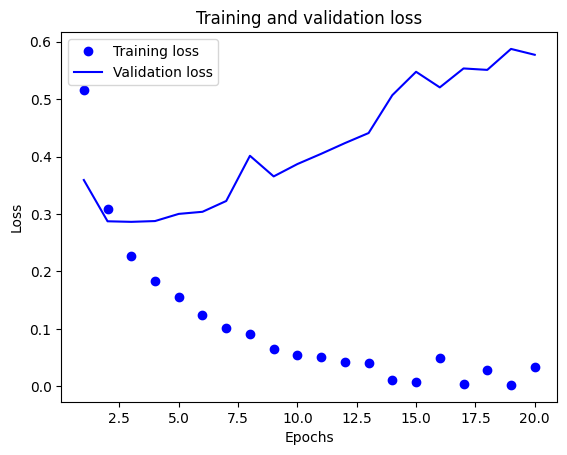

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting training and Validation acccuracy

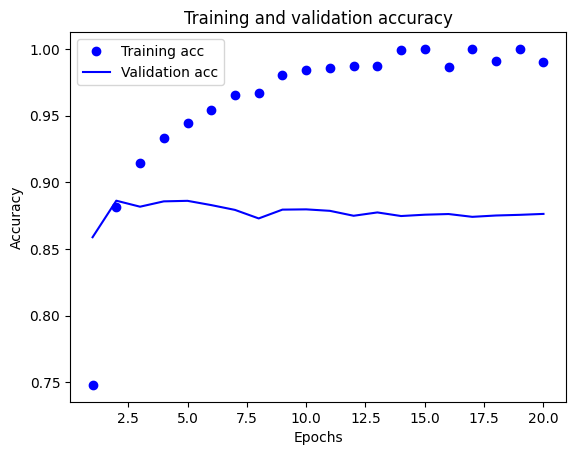

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the model with peak epochs used

In [ ]:
model.fit(x_train, y_train, epochs=2, batch_size=512)
results_test = model.evaluate(x_test, y_test)
results_val = model.evaluate(x_val, y_val)
results_train = model.evaluate(x_train, y_train)
print(results_train)
print(results_val)
print(results_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9472 - loss: 0.1895
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9715 - loss: 0.0926
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8657 - loss: 0.3839
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9638 - loss: 0.1112
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9713 - loss: 0.0923
[0.06094098091125488, 0.9840400218963623]
[0.11455495655536652, 0.9617999792098999]
[0.3791899085044861, 0.8700799942016602]


Model with 1 layer and 1 end layer

In [ ]:
"""
model_1L = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

model_1L = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling Model with 1 layer

In [ ]:
model_1L.compile(optimizer="rmsprop",loss="binary_crossentropy", metrics=["accuracy"])

Training Model with 1 layer

In [ ]:
history = model_1L.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.6905 - loss: 0.5813 - val_accuracy: 0.8722 - val_loss: 0.3587
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8922 - loss: 0.3185 - val_accuracy: 0.8796 - val_loss: 0.3074
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9160 - loss: 0.2462 - val_accuracy: 0.8800 - val_loss: 0.2971
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9278 - loss: 0.2136 - val_accuracy: 0.8899 - val_loss: 0.2761
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9379 - loss: 0.1812 - val_accuracy: 0.8841 - val_loss: 0.2764
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9463 - loss: 0.1630 - val_accuracy: 0.8872 - val_loss: 0.2816
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9522 - loss: 0.1467 - val_accuracy: 0.8853 - val_loss: 0.2846
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9572 - loss: 0.1351 - val_accuracy: 0.8846 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting Validation and Loss for model with 1 layer

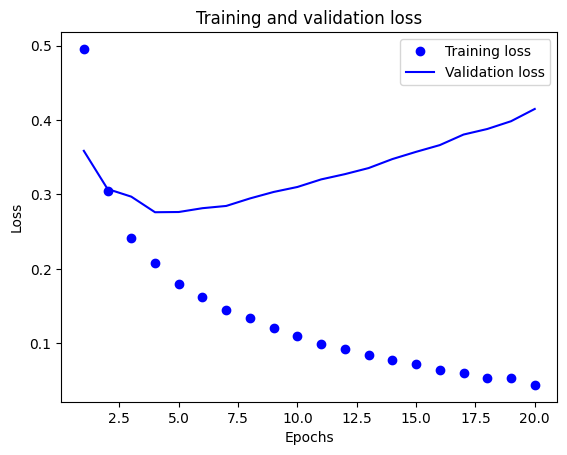

In [ ]:
plt.clf()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Training and Validation Accuracy

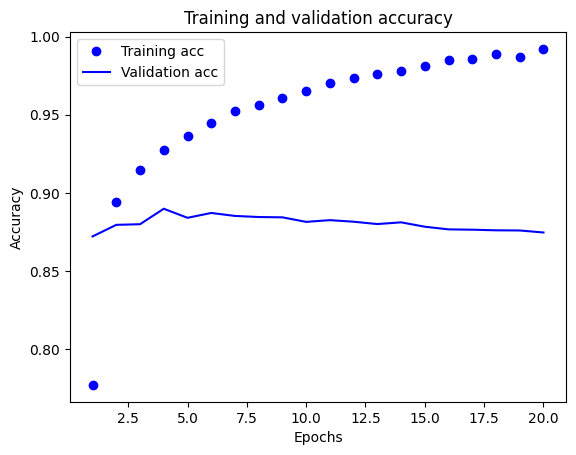

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the model with 1 layer with peak epochs used

In [ ]:
model_1L.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model_1L.evaluate(x_test, y_test)
results_val = model_1L.evaluate(x_val, y_val)
results_train = model_1L.evaluate(x_train, y_train)
print(results_train)
print(results_val)
print(results_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9443 - loss: 0.1810
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9588 - loss: 0.1292
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9655 - loss: 0.1096
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9679 - loss: 0.0991
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8653 - loss: 0.3726
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9622 - loss: 0.1144
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9697 - loss: 0.1001
[0.07501290738582611, 0.9815199971199036]
[0.11897669732570648, 0.9624000191688538]
[0.36631688475608826, 0.8690800070762634]


Build 3 Layer Model

In [ ]:
"""
model_3L = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""
model_3L = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling 3 Layer Model

In [ ]:
model_3L.compile(optimizer='rmsprop',loss="binary_crossentropy", metrics=["accuracy"])

Training 3 Layer Model

In [ ]:
history = model_3L.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6638 - loss: 0.6253 - val_accuracy: 0.8582 - val_loss: 0.4124
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8838 - loss: 0.3554 - val_accuracy: 0.8847 - val_loss: 0.3071
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9143 - loss: 0.2515 - val_accuracy: 0.8888 - val_loss: 0.2791
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9389 - loss: 0.1880 - val_accuracy: 0.8888 - val_loss: 0.2783
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9492 - loss: 0.1556 - val_accuracy: 0.8852 - val_loss: 0.2902
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9561 - loss: 0.1339 - val_accuracy: 0.8858 - val_loss: 0.2967
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9649 - loss: 0.1081 - val_accuracy: 0.8831 - val_loss: 0.3136
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9750 - loss: 0.0885 - val_accuracy: 0.8837 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

3 Layer Model Plot Training Vs Validation Loss

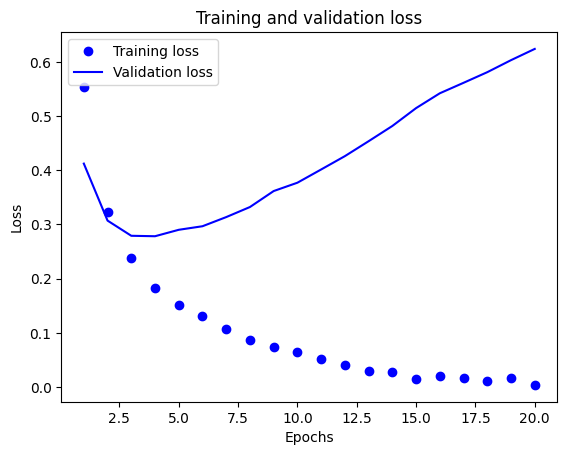

In [ ]:
plt.clf()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

3 Layer Model Plot Training Vs Validation Accuracy

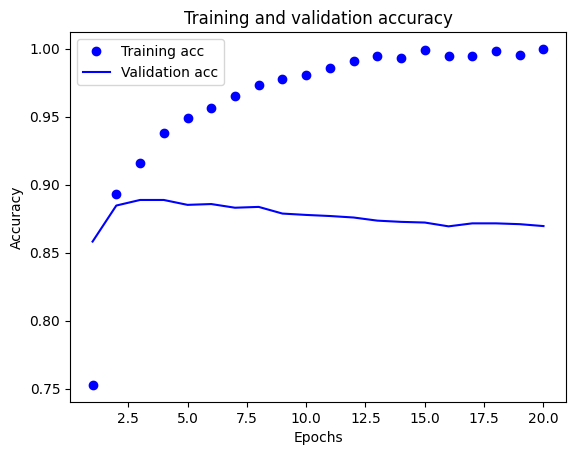

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining with peak epoch

In [ ]:
model_3L.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model_3L.evaluate(x_test, y_test)
results_val = model_3L.evaluate(x_val, y_val)
results_train = model_3L.evaluate(x_train, y_train)
print(results_train)
print(results_val)
print(results_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9432 - loss: 0.2466
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9657 - loss: 0.1189
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9753 - loss: 0.0859
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9800 - loss: 0.0659
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8557 - loss: 0.4947
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9671 - loss: 0.1037
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9725 - loss: 0.0884
[0.0631619542837143, 0.9819999933242798]
[0.10642469674348831, 0.9653000235557556]
[0.48171907663345337, 0.8587599992752075]


Predictions

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.02499973],
       [0.9999337 ],
       [0.30073676],
       ...,
       [0.02462342],
       [0.02817551],
       [0.7352172 ]], dtype=float32)

Summary Table

| Model Var Name | Layers       | Val Accuracy | Val Loss |
| -------------- | ------------ | ------------ | -------- |
| model          | 2 + 1 Output | 0.9602       | 0.1214   |
| model_1L       | 1 + 1 Output | 0.9125       | 0.2413   |
| model_3L       | 3 + 1 Output | 0.8870       | 0.2877   |
